# Gradient Boosting Illustration

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Make this notebook's output stable across runs
random_state = 1000
np.random.seed(random_state)

# Options for plots
%matplotlib inline
sns.set()
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelpad'] = 12

In [2]:
# Generate random data according to the function y = sin(3x) + 0.05*noise
# where noise is a standard normal random variable
X = 2*(np.random.rand(100, 1) - 0.5)
y = np.sin(3*X[:, 0]) + 0.05 * np.random.randn(100)

In [3]:
# Fit an initial decision tree regressor
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=random_state)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=1000)

In [4]:
# Fit a second decision tree regressor on the errors
# from the first regressor
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=random_state)
tree_reg2.fit(X, y2)

# Fit a third decision tree regressor on the errors
# from the second regressor
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=random_state)
tree_reg3.fit(X, y3)

# Fit a fourth decision tree regressor on the errors
# from the third regressor
y4 = y3 - tree_reg3.predict(X)
tree_reg4 = DecisionTreeRegressor(max_depth=2, random_state=random_state)
tree_reg4.fit(X, y4)

DecisionTreeRegressor(max_depth=2, random_state=1000)

In [5]:
# Predict for a new instance
X_new = np.array([[0.1]])
y_pred = sum(tree.predict(X_new) for tree in
             (tree_reg1, tree_reg2, tree_reg3, tree_reg4))
y_pred

array([0.24332385])

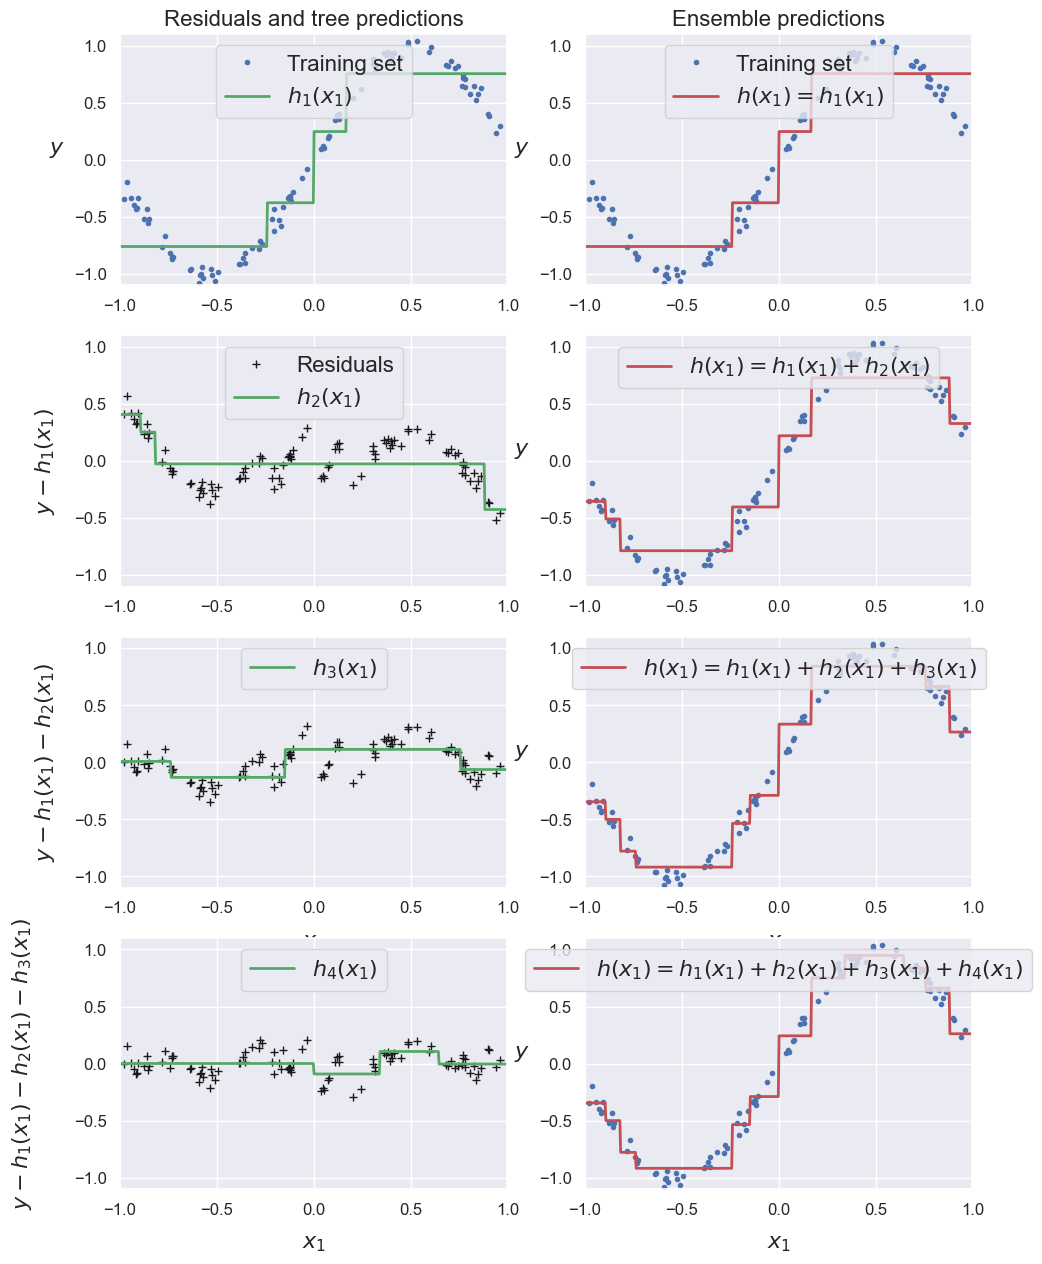

In [6]:
# Plot predictions from each iteration
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,15))

plt.subplot(421)
plot_predictions([tree_reg1], X, y, axes=[-1, 1, -1.1, 1.1], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(422)
plot_predictions([tree_reg1], X, y, axes=[-1, 1, -1.1, 1.1], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(423)
plot_predictions([tree_reg2], X, y2, axes=[-1, 1, -1.1, 1.1], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(424)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-1, 1, -1.1, 1.1], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(425)
plot_predictions([tree_reg3], X, y3, axes=[-1, 1, -1.1, 1.1], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(426)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-1, 1, -1.1, 1.1], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(427)
plot_predictions([tree_reg4], X, y4, axes=[-1, 1, -1.1, 1.1], label="$h_4(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1) - h_3(x_1)$\n", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(428)
plot_predictions([tree_reg1, tree_reg2, tree_reg3, tree_reg4], X, y, axes=[-1, 1, -1.1, 1.1], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1) + h_4(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In [7]:
# Fit gradient boosting regressors with different learning rates
# and numbers of constituent predictors
gbrt = GradientBoostingRegressor(
    max_depth=2, n_estimators=3, learning_rate=1.0,
    random_state=random_state
)
gbrt.fit(X, y)

gbrt_slow_few = GradientBoostingRegressor(
    max_depth=2, n_estimators=10, learning_rate=0.05,
    random_state=random_state
)
gbrt_slow_few.fit(X, y)

gbrt_slow_many = GradientBoostingRegressor(
    max_depth=2, n_estimators=100, learning_rate=0.05,
    random_state=random_state
)
gbrt_slow_many.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, random_state=1000)

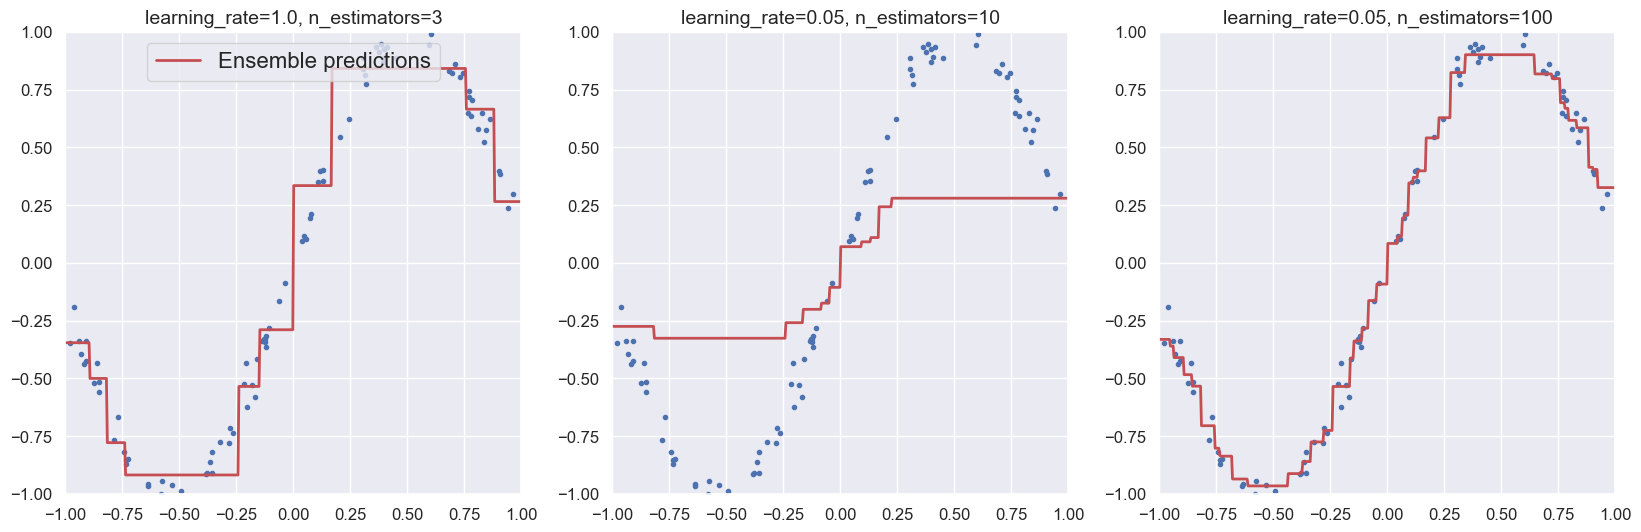

In [8]:
# Plot results
plt.figure(figsize=(20,6))

plt.subplot(131)
plot_predictions([gbrt], X, y, axes=[-1, 1, -1, 1], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(132)
plot_predictions([gbrt_slow_few], X, y, axes=[-1, 1, -1, 1])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow_few.learning_rate, gbrt_slow_few.n_estimators), fontsize=14)

plt.subplot(133)
plot_predictions([gbrt_slow_many], X, y, axes=[-1, 1, -1, 1])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow_many.learning_rate, gbrt_slow_many.n_estimators), fontsize=14)



plt.show()